## Importing Libraries for Training

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Model
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

## Importing Dataset

In [2]:
df= pd.read_csv(r'C:\Users\Kishan Sharma\Python\Data Set\stud.csv')

## Loading Dataset

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
X= df.drop(['math_score'], axis=1)

In [5]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y= df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
print('Categories in Gender:', df['gender'].unique())
print('Categories in Race Ethnicity:', df['race_ethnicity'].unique())
print('Categories in Parental Education:', df['parental_level_of_education'].unique())
print('Categories in Lunch:', df['lunch'].unique())
print('Categories in Test Preparation Course:', df['test_preparation_course'].unique())

Categories in Gender: ['female' 'male']
Categories in Race Ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch: ['standard' 'free/reduced']
Categories in Test Preparation Course: ['none' 'completed']


## Tranforming data in 3 types of transformer

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
numeric_feature= X.select_dtypes(exclude='object').columns
cat_feature= X.select_dtypes(include='object').columns

In [10]:
numeric= StandardScaler()
OH= OneHotEncoder()

preprocessor= ColumnTransformer(
    [('OneHotEncoder', OH, cat_feature),
     ('StandardScaler', numeric, numeric_feature),]
)

In [11]:
X= preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

## Spliting the data into train and testing

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.80, random_state= 35)

## Creating evaluate function to give all metrics after model training

In [15]:
def evaluate_model(true, test):
    mae= mean_absolute_error(true, test)
    mse= mean_squared_error(true, test)
    r2= r2_score(true, test)
    rmse= np.sqrt(mean_squared_error(true, test))
    return mae, mse, r2, rmse

In [17]:
models= {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'KMeans': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBRegressor(),
    'CATBoost': CatBoostRegressor(verbose= False),
    'AdaBoost': AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train)


    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)


    model_train_mae, model_train_mse, model_train_r2, model_train_rmse= evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_r2, model_test_rmse= evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

Linear Regression
Lasso
Ridge
Random Forest
KMeans
Decision Tree
XGBoost
CATBoost
AdaBoost


In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'r2']).sort_values(by=['r2'], ascending=False)

,Model Name,r2
2,Ridge,0.895127
0,Linear Regression,0.894845
7,CATBoost,0.865812
8,AdaBoost,0.848806
3,Random Forest,0.840311
1,Lasso,0.837284
6,XGBoost,0.811096
4,KMeans,0.789860
5,Decision Tree,0.652617


In [19]:
lin_model= LinearRegression()
lin_model= lin_model.fit(X_train, y_train)
pred= lin_model.predict(X_test)
score= r2_score(y_test, pred) * 100
print(f"Accuracy of the model {score}")

Accuracy of the model 89.48452798394396


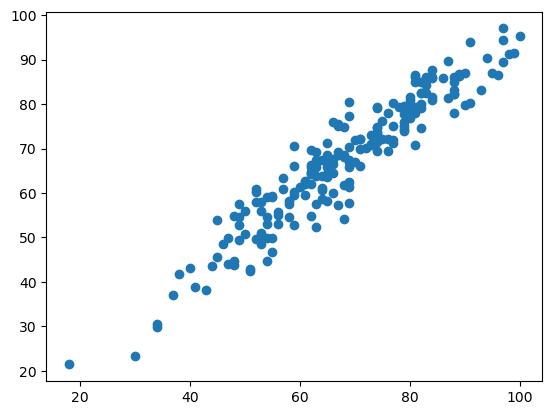

In [20]:
plt.scatter(y_test, pred)

In [21]:
pred_df= pd.DataFrame()
pred_df['actual']= y_test
pred_df['pred']= pred
pred_df['error']= y_test - pred

In [22]:
pred_df

,actual,pred,error
832,64,63.740044,0.259956
617,88,86.122593,1.877407
638,86,85.852911,0.147089
939,77,71.964151,5.035849
826,56,55.118232,0.881768
...,...,...,...
456,79,79.648926,-0.648926
669,81,77.896769,3.103231
677,70,67.048489,2.951511
333,90,86.968118,3.031882


## Conclusion

The linear regression model developed for this analysis demonstrates a high level of accuracy, with an R² score of 89.48%. This indicates that the model explains 89.48% of the variance in the dependent variable, suggesting a strong relationship between the predictors and the outcome. The high R² value reflects the model’s effectiveness in capturing the underlying patterns in the data. However, it is important to consider potential overfitting and validate the model using additional data or cross-validation techniques.